In [1]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from stdp_snn import Classifier
import time

In [2]:
NUM_INPUT_NEURONS = 4  # 4 признака в Iris dataset
NUM_OUTPUT_NEURONS = 3  # 3 класса в Iris

In [3]:
# Загружаем датасет Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Масштабируем данные
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделим данные на обучающую и тестовую выборки
X_train = np.concatenate((X[0:30], X[50:80], X[100:130]))
X_test = np.concatenate((X[30:50], X[80:100], X[130:150]))
y_train = np.concatenate((y[0:30], y[50:80], y[100:130]))
y_test = np.concatenate((y[30:50], y[80:100], y[130:150]))

In [ ]:
NUM_HIDDEN_NEURONS = [24, 12]

TAU = 4  # Временная константа мембраны
THRESHOLD = 1  # Порог срабатывания
OUTPUT_THRESHOLD = 2

BP_EPSILON = 4
BP_LR = 0.001

In [5]:
classifier = Classifier("lif", "bpstdp", NUM_INPUT_NEURONS, NUM_HIDDEN_NEURONS, NUM_OUTPUT_NEURONS, tau=TAU, threshold=THRESHOLD, output_threshold=OUTPUT_THRESHOLD, 
                        bp_epsilon=BP_EPSILON, bp_lr=BP_LR)

In [6]:
classifier.train(X_train, y_train, 15, shuffle_dataset=True)

Epoch: 0; Accuracy: 0.0
Epoch: 1; Accuracy: 0.0
Epoch: 2; Accuracy: 0.0
Epoch: 3; Accuracy: 0.0
Epoch: 4; Accuracy: 0.0
Epoch: 5; Accuracy: 0.0
Epoch: 6; Accuracy: 0.0
Epoch: 7; Accuracy: 0.0
Epoch: 8; Accuracy: 0.0
Epoch: 9; Accuracy: 0.0
Epoch: 10; Accuracy: 0.0
Epoch: 11; Accuracy: 0.0
Epoch: 12; Accuracy: 0.0
Epoch: 13; Accuracy: 0.0
Epoch: 14; Accuracy: 0.0

              Операций: 81775692; 
              Доля умножений: 0.3863006136346728; 
              Операций за проход: 5.177315099715099; 
              Доля спайковых операций: 0.003564735675846787


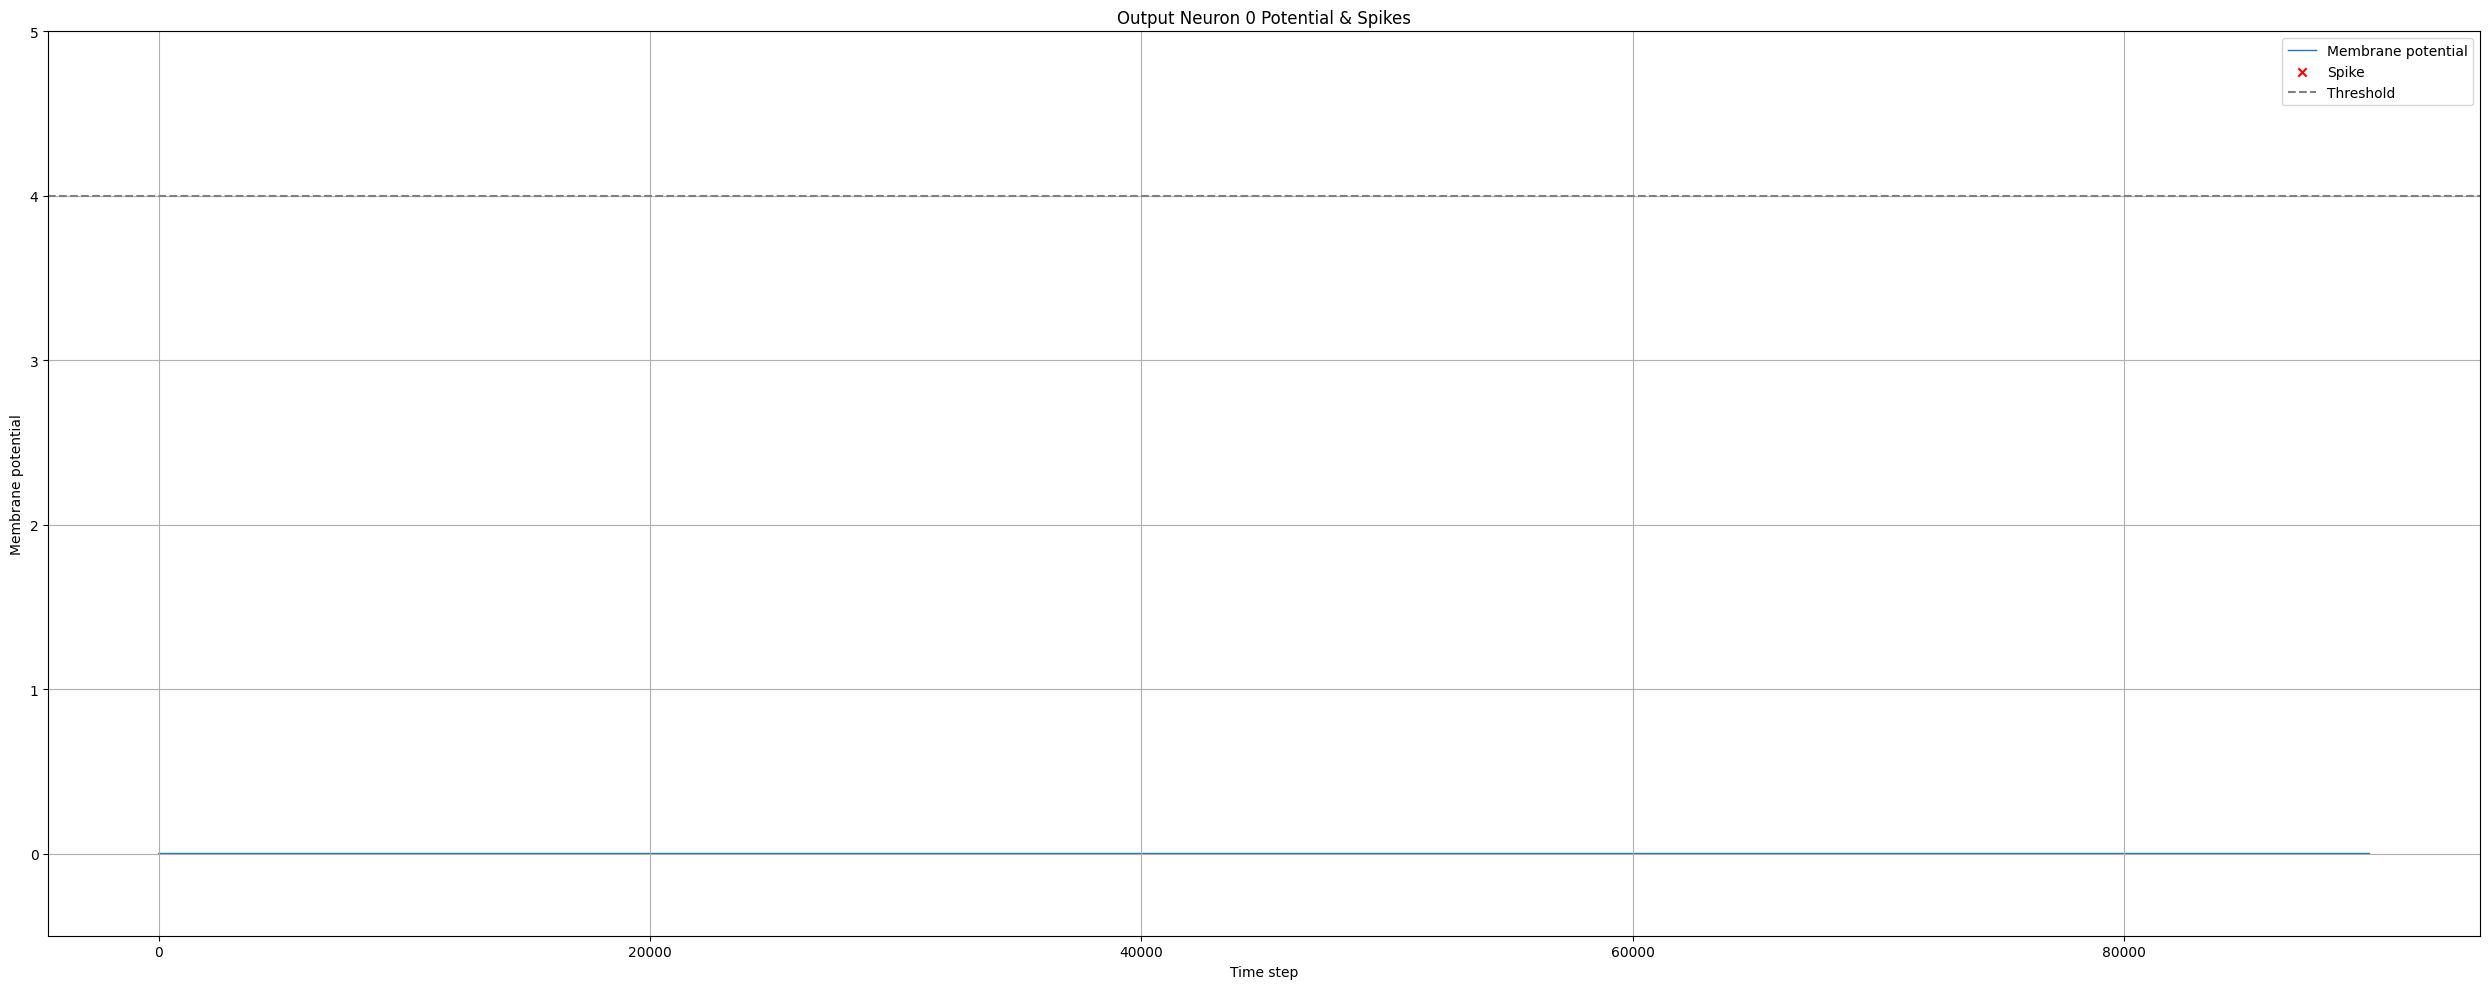

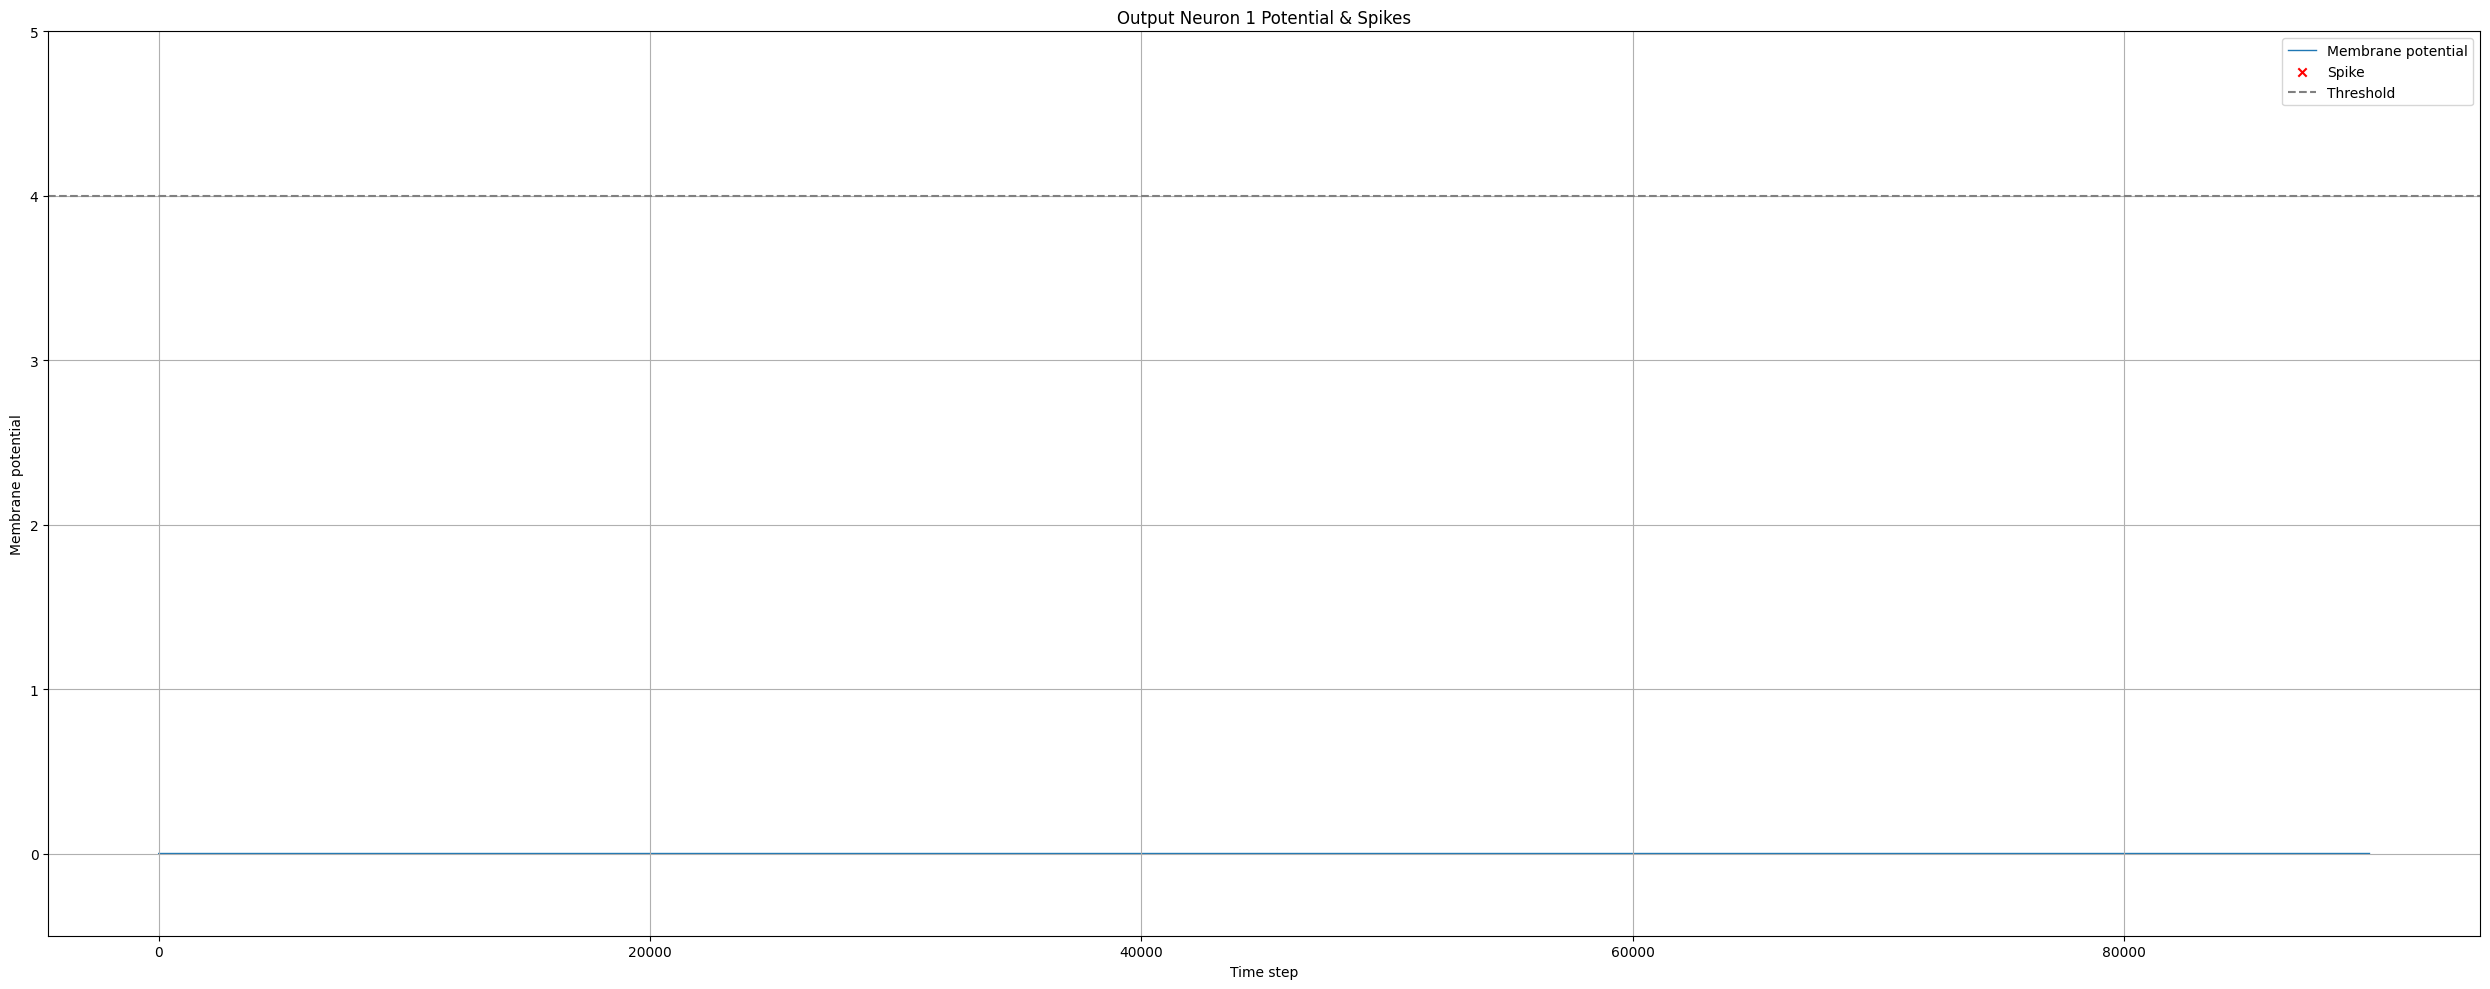

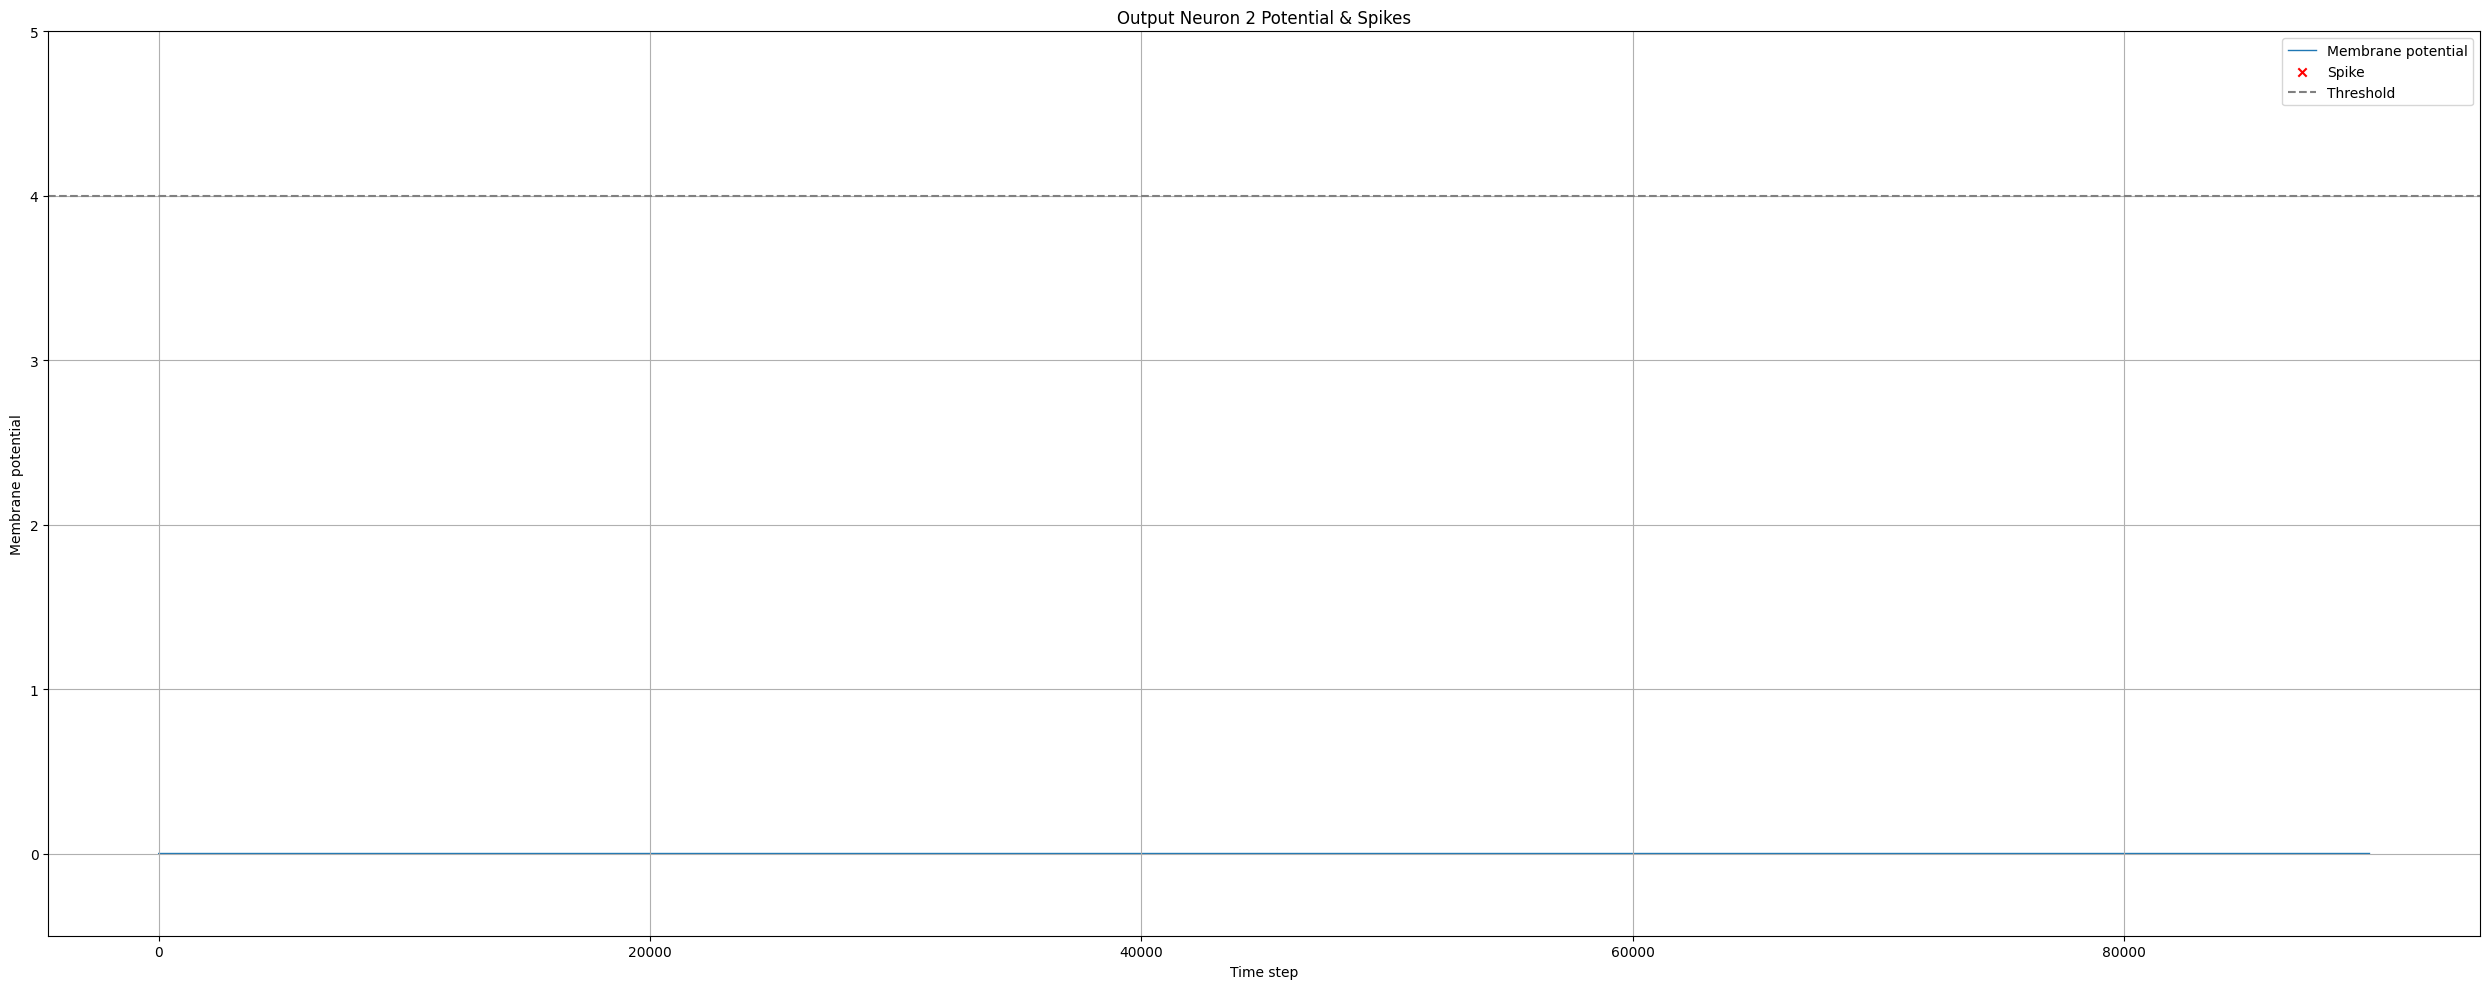

Accuracy: 0.0
Time elapsed: 4.0226171016693115


In [7]:
start = time.time()
print(f"Accuracy: {classifier.test(X_test, y_test, True, plot_history=True)}")
end = time.time()
print(f"Time elapsed: {end - start}")